# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# import citipy as citipy
from citipy import citipy

In [19]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_dedup = []

In [21]:
print(np.random.uniform(10,100,10))

[52.94300281 76.09667647 26.2760156  17.63426459 55.0657928  42.00099917
 87.24084091 40.07778871 38.52630621 89.4534253 ]


In [22]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#Zip - zipped object of tuple

In [23]:
print(lat_lngs)

In [24]:
cities = []
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
#     print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
#     If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# Print the city count to confirm sufficient count



In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?units = Imperial&APPID=" + api_key

In [26]:

# List of city data
city_data = []

# Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
#         print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [27]:
city_data = pd.DataFrame(city_data)
city_data.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

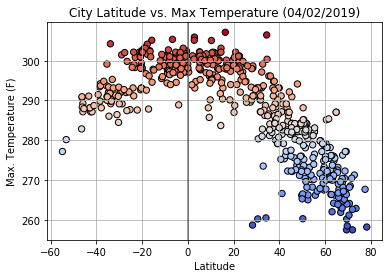

In [29]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], s = 40, c=city_data["Max Temp"],edgecolor="black",
            linewidths=1, marker="o", 
            cmap='coolwarm')
            
plt.title("City Latitude vs. Max Temperature (04/02/2019)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .5)
plt.grid(True)

plt.savefig("Max_Temp_vs_Latitude.png")

plt.show()

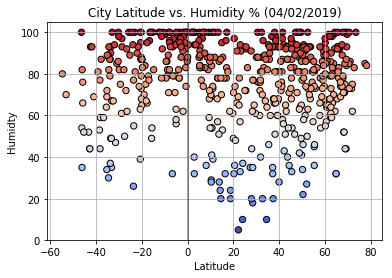

In [32]:
plt.scatter(city_data["Lat"], city_data["Humidity"], s = 40, c=city_data["Humidity"],edgecolor="black",
            linewidths=1, marker="o", 
            cmap='coolwarm')
            
plt.title("City Latitude vs. Humidity % (04/02/2019)")
plt.ylabel("Humidty")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .5)
plt.grid(True)

plt.savefig("Max_Temp_vs_Humidity.png")

plt.show()

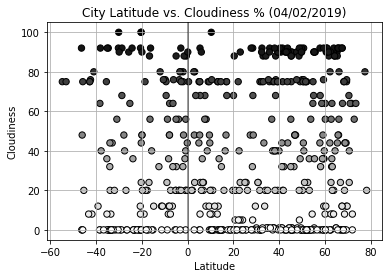

In [33]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], s = 40, c=city_data["Cloudiness"],edgecolor="black", 
            linewidths=1, marker="o", cmap='binary')
            
plt.title("City Latitude vs. Cloudiness % (04/02/2019)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .5)
plt.grid(True)

plt.savefig("Max_Temp_vs_Cloudiness.png")

plt.show()

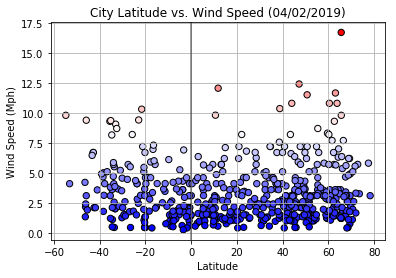

In [35]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], s = 40, c=city_data["Wind Speed"],edgecolor="black",
            linewidths=1, marker="o", cmap='bwr')
            
plt.title("City Latitude vs. Wind Speed (04/02/2019)")
plt.ylabel("Wind Speed (Mph)")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .5)
plt.grid(True)

plt.savefig("Max_Temp_vs_Wind_Speed.png")

plt.show()

In [ ]:
settings = {"units": "Latitude", "Temp": api_key}

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
settings = {"units": "latitude": "Humidity": api_key}

#### Latitude vs. Humidity Plot

In [ ]:
settings = {"units": "Latitude", "Cloudiness": api_key}

#### Latitude vs. Cloudiness Plot

In [ ]:
settings = {"units": "metric", "appid": api_key}

#### Latitude vs. Wind Speed Plot